In [7]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

In [8]:
PATH_CSV = './top_3827348_songs.csv'
SAMPLE_SIZE = 100000
SEED = 42

In [9]:
def to_str(x):
    return x[2:-1]

def to_list(x):
    return [y for y in to_str(x).split(',')]

df = pd.read_csv(
    PATH_CSV,
    nrows=SAMPLE_SIZE,
    usecols=[
        'id', 'name', 'duration', 'explicit', 'popularity', 'loudness', 'tempo',
        'time_signature', 'key', 'mode', 'acousticness', 'danceability',
        'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence'
    ],
    converters={
        'id': to_str, 'name': to_str, 'duration': np.int32, 'explicit': np.int32,
        'popularity': np.int32, 'loudness': np.float32, 'tempo': np.float32,
        'time_signature': np.int32, 'key': np.int32, 'mode': np.int32, 'acousticness': np.float32,
        'danceability': np.float32, 'energy': np.float32, 'instrumentalness': np.float32,
        'liveness': np.float32, 'speechiness': np.float32, 'valence': np.float32
    }
)
df.head()

,id,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0000gBWfr2zIFzE5tDzxca,Sella Stercoraria,507987,0,3,-8.065,80.509003,4,9,0,0.000013,0.322,0.670,0.559000,0.3510,0.0449,0.176
1,0003Z98F6hUq7XxqSRM87H,\xd0\x9c\xd0\xb5\xd0\xbd\xd1\x8f \xd0\xb1\xd0\xbe\xd0\xbb\xd1\x8c\xd1\x88\xd0\xb5 \xd1\x82\xd1\x83\xd1\x82 \xd0\xbd\xd0\xb5\xd1\x82,241666,1,18,-5.408,138.076004,4,1,1,0.086000,0.733,0.711,0.000000,0.4510,0.1580,0.346
2,0003q2V7hAiIYyzXV4sNyQ,"Das wilde Pack, Teil 1: Das wilde Pack, Kapitel 5",200974,0,11,-14.880,79.250000,3,0,1,0.500000,0.520,0.416,0.000000,0.5950,0.9540,0.538
3,000490QTLqT1ftnfwj3kGF,Disco Guitar,73195,0,2,-14.496,157.445007,4,1,1,0.665000,0.742,0.661,0.000052,0.3070,0.1180,0.922
4,00053lDuLvN8Q8voGT3GCt,Soki,279880,0,1,-5.135,104.961998,4,7,1,0.673000,0.622,0.734,0.000002,0.0954,0.0476,0.481


In [10]:
selected_cols = [
    'acousticness', 'danceability', 'duration',
    'energy', 'explicit', 'instrumentalness', 'key',
    'liveness', 'loudness', 'mode', 'popularity',
    'speechiness', 'tempo', 'time_signature', 'valence'
]

df = df[selected_cols]

In [11]:
df.corr(method='pearson', numeric_only=True)

,acousticness,danceability,duration,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.258726,-0.056796,-0.753492,-0.161124,0.200471,-0.030798,-0.072675,-0.615335,0.054425,-0.101982,-0.021059,-0.216202,-0.179224,-0.204775
danceability,-0.258726,1.000000,-0.083338,0.242078,0.150745,-0.275883,0.027022,-0.088169,0.335204,-0.035525,0.118729,0.183910,0.008537,0.166855,0.566717
duration,-0.056796,-0.083338,1.000000,0.014314,-0.056000,0.102370,0.002318,0.020241,-0.021741,-0.040584,-0.020804,-0.048363,-0.003991,0.021531,-0.165883
energy,-0.753492,0.242078,0.014314,1.000000,0.145128,-0.230853,0.040123,0.189838,0.793806,-0.050701,0.088674,0.038607,0.251982,0.190895,0.349385
explicit,-0.161124,0.150745,-0.056000,0.145128,1.000000,-0.133521,0.007050,0.045733,0.143092,-0.046132,0.087481,0.258972,-0.007114,0.050753,0.012510
instrumentalness,0.200471,-0.275883,0.102370,-0.230853,-0.133521,1.000000,-0.015070,-0.097227,-0.397616,-0.039876,-0.133354,-0.161460,-0.052750,-0.061343,-0.304391
key,-0.030798,0.027022,0.002318,0.040123,0.007050,-0.015070,1.000000,-0.000395,0.027677,-0.153352,0.003978,0.026843,0.005985,0.002426,0.028519
liveness,-0.072675,-0.088169,0.020241,0.189838,0.045733,-0.097227,-0.000395,1.000000,0.091975,0.011886,-0.006862,0.182313,0.006242,0.001940,0.003392
loudness,-0.615335,0.335204,-0.021741,0.793806,0.143092,-0.397616,0.027677,0.091975,1.000000,-0.011500,0.132459,-0.035996,0.223948,0.177333,0.357062
mode,0.054425,-0.035525,-0.040584,-0.050701,-0.046132,-0.039876,-0.153352,0.011886,-0.011500,1.000000,-0.015443,-0.041118,0.009185,-0.015188,0.031609


In [12]:
df.corr(method='spearman', numeric_only=True)

,acousticness,danceability,duration,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.176845,-0.153000,-0.746868,-0.145957,0.088250,-0.027754,-0.081965,-0.611181,0.051382,-0.085326,-0.177631,-0.235801,-0.185253,-0.149198
danceability,-0.176845,1.000000,-0.036649,0.189409,0.150974,-0.296384,0.026005,-0.104873,0.230061,-0.040632,0.118862,0.188906,0.010558,0.164641,0.557284
duration,-0.153000,-0.036649,1.000000,0.088340,-0.056311,0.115656,0.005560,-0.049270,0.054042,-0.068901,0.009056,-0.080060,0.030585,0.037759,-0.171420
energy,-0.746868,0.189409,0.088340,1.000000,0.139367,-0.162833,0.039268,0.171488,0.802608,-0.051762,0.089151,0.276110,0.253009,0.196293,0.321784
explicit,-0.145957,0.150974,-0.056311,0.139367,1.000000,-0.191147,0.007412,0.054163,0.152338,-0.046132,0.061921,0.302936,-0.011802,0.061617,0.015161
instrumentalness,0.088250,-0.296384,0.115656,-0.162833,-0.191147,1.000000,-0.013225,-0.114222,-0.342351,-0.045427,-0.151821,-0.154771,-0.013170,-0.047043,-0.322356
key,-0.027754,0.026005,0.005560,0.039268,0.007412,-0.013225,1.000000,-0.002795,0.029244,-0.151681,0.004990,0.040142,0.005431,0.003237,0.027687
liveness,-0.081965,-0.104873,-0.049270,0.171488,0.054163,-0.114222,-0.002795,1.000000,0.100526,0.010086,-0.000729,0.119341,0.015538,0.007751,-0.004662
loudness,-0.611181,0.230061,0.054042,0.802608,0.152338,-0.342351,0.029244,0.100526,1.000000,-0.019503,0.133752,0.136064,0.208168,0.160738,0.306836
mode,0.051382,-0.040632,-0.068901,-0.051762,-0.046132,-0.045427,-0.151681,0.010086,-0.019503,1.000000,-0.013451,-0.082915,0.006241,-0.018418,0.030631


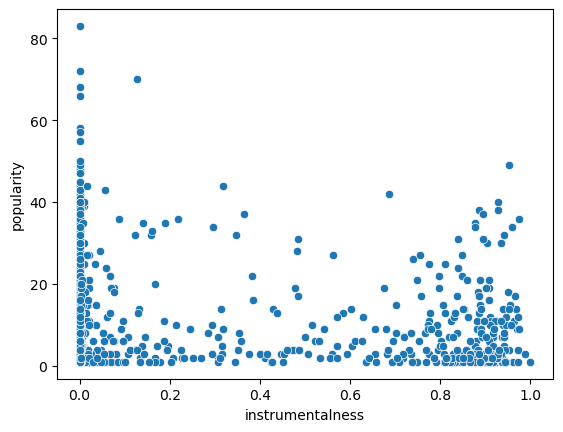

In [13]:
sns.scatterplot(data=df.head(1000), x='instrumentalness', y='popularity')
plt.show()